In [7]:
from keras import models
from keras import layers

model=models.Sequential()
# Dense全結合層 入力が784次元で、出力を32次元にする 
model.add(layers.Dense(32,input_shape=(784,)))
# 入力が表記されていな場合は入力側の層の形状にあわせて動的に構築される。
model.add(layers.Dense(32))


In [37]:
# iMDBデータの読み込み　num_wordsで出現頻度の高いもののみをとりだす
from keras.datasets import imdb

(X_train_origin,y_train_origin),(X_test_origin,y_test_origin)=imdb.load_data(num_words=10000)


In [38]:
print(X_train.shape)
print(y_train)
print(X_test.shape)
print(y_test)

print(max(max(sequence for sequence in X_train_origin)))
# 単語と番号の辞書を取得
word_index=imdb.get_word_index()
# 単語：番号を番号：単語にかえる
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decode_review=' '.join([reverse_word_index.get(i-3,'?') for i in X_train_origin[0]])
decode_review

(25000, 10000)
[1 0 0 ... 0 1 0]
(25000, 10000)
[0 1 1 ... 0 0 0]
9995


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [49]:
#onehot エンコーディング
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

import copy

X_train=vectorize_sequences(X_train_origin)
X_test=vectorize_sequences(X_test_origin)

print(X_train.shape)
print(X_test.shape)

y_train=np.asarray(y_train_origin).astype('float32')
y_test=np.asarray(y_test_origin).astype('float32')

print(y_train.shape)
print(y_test.shape)


(25000, 10000)
(25000, 10000)
(25000,)
(25000,)


In [58]:
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
from keras import losses

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu',input_shape=(16,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [63]:
# 検証データを訓練データから分割する
X_val=X_train[:10000]
partial_X_train=X_train[10000:]
print(X_train.shape)
print(X_val.shape)
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(y_train.shape)
print(partial_y_train.shape)


(25000, 10000)
(10000, 10000)
(25000,)
(15000,)


In [65]:
history=model.fit(partial_X_train,
                  partial_y_train,
                  batch_size=512,
                  epochs=20,
                  validation_data=(X_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.4845 - binary_accuracy: 0.7966 - val_loss: 0.3558 - val_binary_accuracy: 0.8738
Epoch 2/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.2834 - binary_accuracy: 0.9047 - val_loss: 0.2969 - val_binary_accuracy: 0.8848
Epoch 3/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.2084 - binary_accuracy: 0.9307 - val_loss: 0.3007 - val_binary_accuracy: 0.8770
Epoch 4/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1719 - binary_accuracy: 0.9423 - val_loss: 0.2754 - val_binary_accuracy: 0.8892
Epoch 5/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1363 - binary_accuracy: 0.9567 - val_loss: 0.2849 - val_binary_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1146 - binary_a

In [67]:
# model.fit の返り値 hisotryのhistoryメンバーには訓練中のデータが格納されている
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

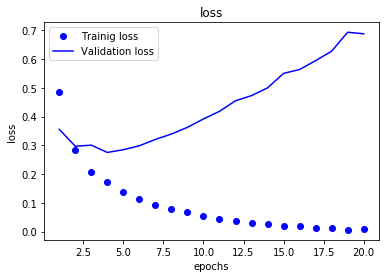

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Trainig loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

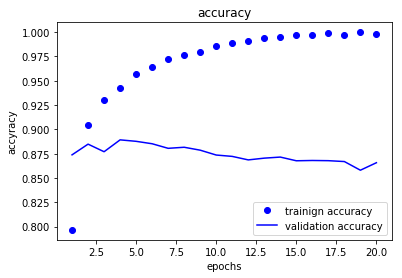

In [72]:
acc=history_dict['binary_accuracy']
val_acc=history_dict['val_binary_accuracy']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='trainign accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accyracy")
plt.legend()
plt.show()

In [79]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu',input_shape=(16,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.fit(partial_X_train,partial_y_train,epochs=4,batch_size=512)
results=model.evaluate(X_test,y_test)
print(results)


Epoch 1/4
15000/15000 [==============================] - 1s 61us/step - loss: 0.5075 - binary_accuracy: 0.7815
Epoch 2/4
15000/15000 [==============================] - 1s 42us/step - loss: 0.2967 - binary_accuracy: 0.9016
Epoch 3/4
15000/15000 [==============================] - 1s 42us/step - loss: 0.2200 - binary_accuracy: 0.9251
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step
[0.3107783252191544, 0.87368]


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.1610 - acc: 0.7664 - val_loss: 0.1401 - val_acc: 0.8007
Epoch 2/4
15000/15000 [==============================] - 1s 67us/step - loss: 0.0779 - acc: 0.9009 - val_loss: 0.0974 - val_acc: 0.8670
Epoch 3/4
15000/15000 [==============================] - 1s 68us/step - loss: 0.0545 - acc: 0.9295 - val_loss: 0.1093 - val_acc: 0.8519
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step
[0.10515637971460819, 0.85996]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


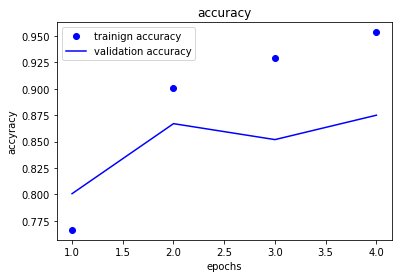

In [96]:
# 実験
hidden_num=128
activation='relu'
model=models.Sequential()
model.add(layers.Dense(hidden_num,activation=activation,input_shape=(10000,)))
model.add(layers.Dense(hidden_num,activation=activation))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])
history=model.fit(partial_X_train,partial_y_train,epochs=4,batch_size=512,validation_data=(X_val,y_val))
results=model.evaluate(X_test,y_test)
print(results)

history_dict=history.history
print(history_dict.keys())

acc=history_dict['acc']
val_acc=history_dict['val_acc']

epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='trainign accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accyracy")
plt.legend()
plt.show()
